# Discovering the Two Best Markets for Advertising an E-learning Product

With this product, we aim to find the best markets to advertise e-learning products on programming. The courses cover a wide variety of topics from game development to data science.

## Understanding the Data

For out purposes, we will be using the freeCodeCamp 2017 New Coder survey. freeCodeCamp is a e-learning platform that iffers courses on web development, and the company runs a publication with over 400,000 subscribers that attracts new coders with varying interests.

Let us go ahead and do some quick exploration of the data provided to us within [Github](https://github.com/freeCodeCamp/2017-new-coder-survey). This file is stored in the clean-data folder, so we should be good to go on diving straight into the dataset.

In [1]:
import pandas as pd

data = pd.read_csv("C:\\Users\\pc\\Desktop\\Dataquest\\Finding the Best Markets to Advertise In\\2017-fCC-New-Coders-Survey-Data.csv")
print(data.shape)
data.head(5)

(18175, 136)


C:\Users\pc\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
col = []
for column in data.columns:
    col.append(column)
print(col)

['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampLoanYesNo', 'BootcampName', 'BootcampRecommend', 'ChildrenNumber', 'CityPopulation', 'CodeEventConferences', 'CodeEventDjangoGirls', 'CodeEventFCC', 'CodeEventGameJam', 'CodeEventGirlDev', 'CodeEventHackathons', 'CodeEventMeetup', 'CodeEventNodeSchool', 'CodeEventNone', 'CodeEventOther', 'CodeEventRailsBridge', 'CodeEventRailsGirls', 'CodeEventStartUpWknd', 'CodeEventWkdBootcamps', 'CodeEventWomenCode', 'CodeEventWorkshops', 'CommuteTime', 'CountryCitizen', 'CountryLive', 'EmploymentField', 'EmploymentFieldOther', 'EmploymentStatus', 'EmploymentStatusOther', 'ExpectedEarning', 'FinanciallySupporting', 'FirstDevJob', 'Gender', 'GenderOther', 'HasChildren', 'HasDebt', 'HasFinancialDependents', 'HasHighSpdInternet', 'HasHomeMortgage', 'HasServedInMilitary', 'HasStudentDebt', 'HomeMortgageOwe', 'HoursLearning', 'ID.x', 'ID.y', 'Income', 'IsEthnicMinority', 'IsReceiveDisabilitiesBenefits', 'IsSoftwareDev', 'IsUnderEmployed', 'JobApplyWh

## Checking for Proper Samples

For our study, we want to find the population of new coders that are interested in learning certain subjects that we may teach. We want to figure out:

* Where do these coders live
* What location contains the highest density of new coders
* How much money are they willing to spend

Let's first take a look at the *JobRoleInterest* column to see where participants would like to work.

In [3]:
job_freq = data["JobRoleInterest"].value_counts(normalize = True) * 100
job_freq

Full-Stack Web Developer                                                                                                                                                                                                                                                                    11.770595
  Front-End Web Developer                                                                                                                                                                                                                                                                    6.435927
  Data Scientist                                                                                                                                                                                                                                                                             2.173913
Back-End Web Developer                                                                                                

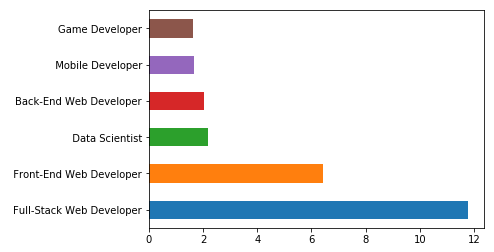

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
job = job_freq[0:6]
job
job.plot.barh()


From our frequency distribution, it seems that:

* Many people are interested in web development (Full-stack, Front-End, Back-End)
* Not many people are interested in mobile development
* Outside of these two domains, there does seem to be scattered interests in other forms of developments.

Another thing to note is that many individuals seems to be interested in more than subject. To gain a better understanding of the data as a whole, let's attempt to split the strings in the columns to find the total number of respondents in each category and find the frequency distribution for the new data.

In [9]:
drop_nulls = data["JobRoleInterest"].dropna()
split_data = drop_nulls.str.split(",")

no_of_options = split_data.apply(lambda x: len(x))
no_of_options.value_counts(normalize=True).sort_index()*100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

From the data above, it seems that approximately 31.65% of all participants have a solid idea of what field of programming they want to pursue.

For the purposes of our study, let's try to see how many of these respondents chose either web or mobile development.

In [12]:
web_mobile = drop_nulls.str.contains("Web Developer|Mobile Developer")
web_mobile_freq = web_mobile.value_counts(normalize=True)*100
print(web_mobile_freq)

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


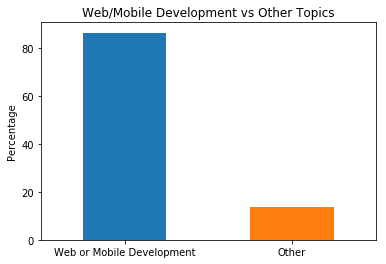

In [19]:
web_mobile_freq.plot.bar()
plt.title("Web/Mobile Development vs Other Topics")
plt.ylabel("Percentage")
plt.xticks([0,1],["Web or Mobile Development","Other"], rotation = 0)
plt.ylim=[0,100]

It seems that around 86% of people are interested in either web or mobile development. This tells us that we should focus our content to these particular niches for the most return on investments.

Let's continue by answering the following questions:

* Where are these new coders located
* Where is the highest density of coders
* How much money are they willing to spend

## Location and Density

Let's attempt to find where the coders are located and their densities. The dataset provides information regarding each participant's locations at a country level. We'll think of each country as its own market to find the two best countries to work with.

Let's find the distribution table of the *CountryLive* variable. We'll work with just these participants and figure out what they want to work in to retrieve our representative sample.

In [21]:
data_notnull = data[data["JobRoleInterest"].notnull()].copy()

absolute_freq = data_notnull["CountryLive"].value_counts()
relative_freq = data_notnull["CountryLive"].value_counts(normalize=True)*100

pd.DataFrame(data = {"Absolute Frequencies":absolute_freq,"Percentage":relative_freq})

,Absolute Frequencies,Percentage
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


It seems that 45.7% of our customers are based in the US, with India coming in second with 7.7%. (United Kingdom: 4.6%, Canada: 3.8%)

While this is useful information, we should go a little more in depth and figure out how much money each individual is willing to spend. It wouldn't make sense for us to advertise in markets where people value free education, as this would be extremely unprofitable.

## Money Spending for Education

The *MoneyForLearning* column tells us the amount of money that spent by a participant from the moment they started coding to the moment that they took the survey (in USD). Our company of interest sells its service at $59 per month, so let us try to use this metric to determine how much a participant spends a month.

Let us use the data of the US, India, UK, and Canada. The reason for this scope is because they contain the highest frequencies which means more data for us to look at, and our courses are taught in English so we should narrow our focuses to countries where it is more likely that the participants are knowledgeable of the language.

We will begin by creating a new columns that describes how much money a user has spent per month. In order to do that, we will divide the *MoneyForLearning* column by the *MonthsProgramming* column.

Something quick to note is that some students answered that they have been learning for 0 months. To avoid a divide by 0 error, we will replace the 0's to 1's in the *MonthsProgramming* column.

In [23]:
#Replace 0's to 1's
data_notnull["MonthsProgramming"].replace(0,1,inplace=True)

#Create new column for money made per month
data_notnull["money_per_month"] = data_notnull["MoneyForLearning"] / data_notnull["MonthsProgramming"]

data_notnull["money_per_month"].isnull().sum()
data_notnull = data_notnull[data_notnull["money_per_month"].notnull()]

Let's go ahead and group the data by country, and then measure the average amount of money spent by each. Let's start by removing the null values for *CountryLive* and see if we still have enough data for each country.

In [24]:
data_notnull = data_notnull[data_notnull["CountryLive"].notnull()]

In [26]:
data_notnull["CountryLive"].value_counts().head()

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
Name: CountryLive, dtype: int64

It seems like we should have enough data to work with, so let's go ahead and find the average each student spent per month.

In [29]:
countries_mean = data_notnull.groupby("CountryLive").mean()
countries_mean['money_per_month'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money_per_month, dtype: float64

Our findings for the UK and Canada are a bit surprising compared to the values we found for India. If we take into consideration a few socio-economical metrics such as GDP per Capita, it would make sense that the UK and Canada would have more people spending on education than India.

It could be that we have too little data or perhaps even have some outliers. Let us go ahead and see what we can find.

## Discovering Outliers

Let's go ahead and use box plots to visualize any outliers that our data may contain.

([<matplotlib.axis.XTick at 0x1f3cbe13198>,
 <a list of 4 Text xticklabel objects>)

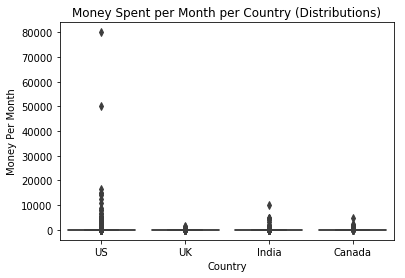

In [35]:
#Isolate countries that we are interested in
countries = data_notnull[data_notnull['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

import seaborn as sns
sns.boxplot(x="CountryLive",y="money_per_month",data=countries)
plt.title("Money Spent per Month per Country (Distributions)")
plt.ylabel("Money Per Month")
plt.xlabel("Country")
plt.xticks(range(4),["US","UK","India","Canada"])

While is is extremely difficult for us to see the plots, we can immediately see that the US has some strange outliers in its data. There are two points that go over 50000, which is fairly impossible. To remedy this, let's filter out any dates in which a participant has spent more than 20000.

In [39]:
data_notnull = data_notnull[data_notnull["money_per_month"] <= 20000]

Now, let's go ahead and recompute the mean values and replot the boxes.

In [40]:
countries_mean = data_notnull.groupby('CountryLive').mean()
countries_mean['money_per_month'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    183.800110
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money_per_month, dtype: float64

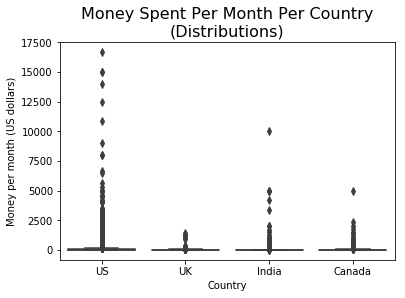

In [41]:
# Isolate again the countries of interest
countries = data_notnull[data_notnull['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

# Box plots to visualize distributions
sns.boxplot(y = 'money_per_month', x = 'CountryLive',
            data = countries)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

India does seem to have some outliers of values of 2500, but we are unsure if this is actually good data or not. Perhaps these individuals just attended more expensive bootcamps. Let's try and examine these points to gain a little more information.

In [43]:
india_outliers = countries[
    (countries["CountryLive"] == "India") & (countries["money_per_month"] >= 2500)
]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5000.000000
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,4166.666667


It seems like none of these participants attended bootcamps. It's difficult to figure out if these individuals acually spent this much money on learning code, and sonmething to note is that the survey's actual question was *"Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)?"* so perhaps there's a chance that they included university tuition on accident.

In any case, let's go ahead and remove these points to be safe.

In [44]:
countries = countries.drop(india_outliers.index)

Looking back at the box plot above, we can also see more extreme outliers for the US (values over \$6000 per month). Let's examine these participants in more detail.

In [45]:
us_outliers = countries[
    (countries['CountryLive'] == 'United States of America') & 
    (countries['money_per_month'] >= 6000)]

us_outliers


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.000000
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,10833.333333
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,14000.000000
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6666.666667
9778,33.0,1.0,0.0,1.0,Grand Circus,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
16650,29.0,0.0,NaN,NaN,NaN,NaN,2.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16666.666667
16997,27.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12500.000000


Out of the 11 outliers, 6 of them did attend bootcamps which makes the outliers more understandable. However, it gets a little more confusing for the other five who haven't attended bootcamps, so we will get rid of this data.

Furthermore, the data indicates that eight respondents have only been programming for 3 months when completing the survey and it doesn't make sense that they would have paid this much money in this short span of time, so we will remove these outliers as well.

In [46]:
# Remove the respondents who didn't attendent a bootcamp
no_bootcamp = countries[
    (countries['CountryLive'] == 'United States of America') & 
    (countries['money_per_month'] >= 6000) &
    (countries['AttendedBootcamp'] == 0)
]

countries = countries.drop(no_bootcamp.index)


# Remove the respondents that had been programming for less than 3 months
less_than_3_months = countries[
    (countries['CountryLive'] == 'United States of America') & 
    (countries['money_per_month'] >= 6000) &
    (countries['MonthsProgramming'] <= 3)
]

countries = countries.drop(less_than_3_months.index)

Looking again at the last box plot above, we can also see an extreme outlier for Canada — a person who spends roughly \$5000 per month. Let's examine this person in more depth.

In [47]:
# Examine the extreme outliers for Canada
canada_outliers = countries[
    (countries['CountryLive'] == 'Canada') & 
    (countries['money_per_month'] > 4500)]

canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


Here, the situation is similar to some of the US respondents — this participant had been programming for no more than two months when he completed the survey. He seems to have paid a large sum of money in the beginning to enroll in a bootcamp, and then he probably didn't spend anything for the next couple of months after the survey. We'll take the same approach here as for the US and remove this outlier.

In [48]:
# Remove the extreme outliers for Canada
countries = countries.drop(canada_outliers.index)

In [49]:
# Recompute mean sum of money spent by students each month
countries.groupby('CountryLive').mean()['money_per_month']

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: money_per_month, dtype: float64

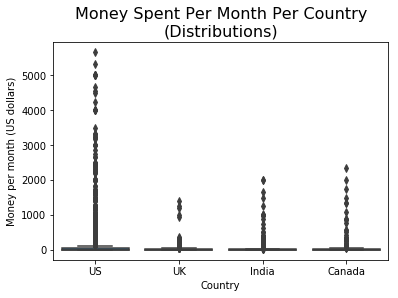

In [50]:
# Visualize the distributions again
sns.boxplot(y = 'money_per_month', x = 'CountryLive',
            data = countries)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
          fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

## Choosing the Two best Markets

To start, it is a bit of a no-brainer to advertise in the US. The average spending per month of US citizens is around \$143, which is well above our subscription fee of \$59.

Canada seems to be the second best choice as they are willing to pay \$93 per month, whereas India is willing to pay \$66 and the UK is willing to pay \$45.

While the data suggest that we shouldn't advertise in the UK, let's attempt to take a little but of a closer look between Canada and India for a potential second best choice. The reason we want to check is because India does have almost twice more potential customers in India than in Canada.

In [52]:
countries["CountryLive"].value_counts(normalize=True)*100

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

It's not too clear whether to choose between Canada and India. At this point, we have several options:

1. Advertise in the US, India, and Canada by splitting the advertisement budget in various combinations:
    * 60% for the US, 25% for India, 15% for Canada.
    * 50% for the US, 30% for India, 20% for Canada; etc.
    

2. Advertise only in the US and India, or the US and Canada. Again, it makes sense to split the advertisement budget unequally. For instance:
    * 70% for the US, and 30% for India.
    * 65% for the US, and 35% for Canada; etc.


3. Advertise only in the US.

At this point, it's probably best to send our analysis to the marketing team and let them use their domain knowledge to decide. They might want to do some extra surveys in India and Canada and then get back to us for analyzing the new survey data.



## Conclusion

In this project, we analyzed survey data from new coders to find the best two markets to advertise in. The only solid conclusion we reached is that the US would be a good market to advertise in.

For the second best market, it wasn't clear-cut what to choose between India and Canada. We decided to send the results to the marketing team so they can use their domain knowledge to take the best decision.